In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn import preprocessing
import random
from sklearn.cluster import KMeans

In [2]:
Data = pandas.read_csv("iris.data")
Data.iloc[:5, :] #แสดงตัวอย่างข้อมูล

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
label = Data['class']
label.iloc[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [4]:
#Prepare Data
encoder = preprocessing.LabelEncoder()
encoder.fit(np.unique(label))
Y = encoder.transform(pandas.Series(label))
Y = Y.reshape(Y.shape[0], 1)

In [5]:
X = Data.loc[:, :'petal width']
X.iloc[:5, :]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>


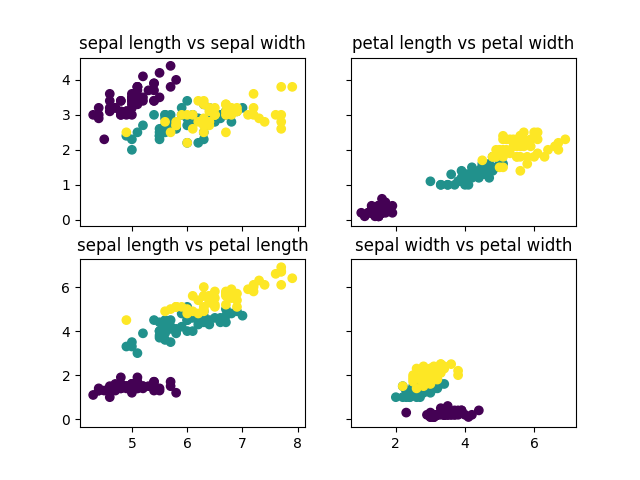

In [6]:
plot, plt_area= plt.subplots(2, 2, sharex='col', sharey='row')

plt_area[0, 0].set_title("sepal length vs sepal width")
plt_area[0, 0].scatter(X['sepal length'], X['sepal width'], c = Y)

plt_area[0, 1].set_title("petal length vs petal width")
plt_area[0, 1].scatter(X['petal length'], X['petal width'], c = Y)

plt_area[1, 0].set_title("sepal length vs petal length")
plt_area[1, 0].scatter(X['sepal length'], X['petal length'], c = Y)

plt_area[1, 1].set_title("sepal width vs petal width")
plt_area[1, 1].scatter(X['sepal width'], X['petal width'], c = Y)

In [7]:
def find_feature_range(X):
    feature_range = []
    feature_size = X.shape[1]
    for i in xrange(feature_size):
        feature_range.append((X[:, i].min(), X[:, i].max()))
    return feature_range

In [8]:
def random_centroid(X, K):
    feature_range = find_feature_range(X)
    centroids = []
    sample_size = X.shape[0]
    for i in xrange(K):
        centroids.append(X[random.randint(0, sample_size), :])
    return np.array(centroids)

In [9]:
def find_cluster(X, Centroids):
    sample_size, feature_size = X.shape
    cluster_size = Centroids.shape[0]
    Ones = np.ones((feature_size, 1))
    A = np.zeros((sample_size, cluster_size))
    for i in xrange(sample_size):
        X_i = X[i]
        Distance = np.sqrt(((X_i - Centroids) ** 2).dot(Ones))
        A[i, Distance.argmin(axis=0)] = 1
    return A

In [10]:
def k_mean_matrix(X, K, iterate):
    Centroids = random_centroid(X, K)
    cluster_size = Centroids.shape[0]
    sample_size = X.shape[0]
    for j in xrange(iterate):
        Cluster = find_cluster(X, Centroids) 
        for i in xrange(cluster_size):
            select_cluster = Cluster[:, i].reshape(sample_size, 1)
            n = np.count_nonzero(select_cluster)
            summa = np.sum(X * select_cluster, axis=0)
            Centroids[i] = summa / float(n)
    Cluster = find_cluster(X, Centroids)
    predicted = Cluster.dot(np.arange(K))
    return predicted, Centroids

In [11]:
def k_mean_normal(X, K, iterate):
    Centroids = random_centroid(X, K)
    sample_size, feature_size = X.shape
    for loop in xrange(iterate):
        Cluster = find_cluster(X, Centroids)
        for i in xrange(K):
            z = Cluster[:, i]
            m = Centroids[i, :]
            n = np.count_nonzero(z)
            if n == 0 : 
                continue       
            summa = 0
            for j in xrange(sample_size):
                if z[j] == 1:
                    x = X[j, :]
                    summa += x
            Centroids[i, :] = summa / n
    Cluster = find_cluster(X, Centroids)
    predicted = Cluster.dot(np.arange(K))
    return predicted, Centroids

<IPython.core.display.Javascript object>


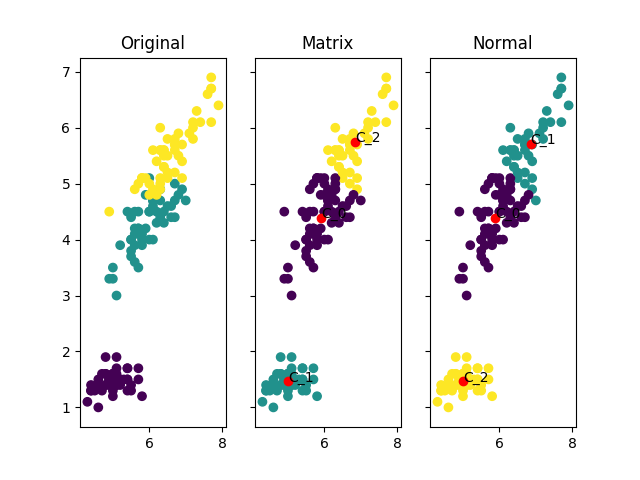

In [12]:
K = 3
X = np.array(X)
sample_size = X.shape[0]

predicted_mat, centroids_mat = k_mean_matrix(X, K, 300)
predicted_nor, centroids_nor = k_mean_normal(X, K, 300)

plot, plt_area2= plt.subplots(1, 3, sharex='col', sharey='row')
plt_area2[0].set_title("Original")
plt_area2[0].scatter(X[:, 0], X[:, 2], c=Y)

plt_area2[1].set_title("Matrix")
plt_area2[1].scatter(X[:, 0], X[:, 2], c=predicted_mat)
plt_area2[1].scatter(centroids_mat[:, 0], centroids_mat[:, 2], c='r')
for i, txt in enumerate(["C_" + str(i) for i in xrange(len(centroids_mat))]):
    plt_area2[1].annotate(txt, (centroids_mat[i, 0], centroids_mat[i, 2]))
    
plt_area2[2].set_title("Normal")
plt_area2[2].scatter(X[:, 0], X[:, 2], c=predicted_nor)
plt_area2[2].scatter(centroids_nor[:, 0], centroids_nor[:, 2], c='r')
for i, txt in enumerate(["C_" + str(i) for i in xrange(len(centroids_nor))]):
    plt_area2[2].annotate(txt, (centroids_nor[i, 0], centroids_nor[i, 2]))

plt.autoscale()